# Movie Synopsis Clustering and Visualization

### Part 1: Environment Setup and Data Loading

In [2]:
import pandas as pd  # Import pandas for data manipulation and CSV handling
import numpy as np   # Import numpy for numerical operations and array loading
import matplotlib.pyplot as plt  # Import matplotlib for data visualization
from sklearn.cluster import KMeans  # Import KMeans algorithm for clustering
from sklearn.metrics import silhouette_score  # Import metric to evaluate clustering quality
from sklearn.manifold import TSNE  # Import t-SNE for high-dimensional data visualization

# Load the pre-computed vector embeddings for the movie synopses
embeddings = np.load('synopsis_embeddings.npy')

# Load the cleaned movie metadata from a CSV file into a DataFrame
df = pd.read_csv('movies_cleaned.csv')

### Part 2: Hyperparameter Tuning (Finding Optimal K)

In [3]:
scores = []  # Initialize a list to store silhouette scores for each k
best_k = -1  # Placeholder variable for the optimal number of clusters
best_score = -1  # Placeholder variable for the highest silhouette score found

# Iterate through a range of possible cluster counts from 2 to 15
for k in range(2,16):
    # Initialize the KMeans model with k clusters and a fixed seed for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model and predict cluster labels for the embeddings
    labels = kmeans.fit_predict(embeddings)
    
    # Calculate the silhouette score to evaluate the quality of the clustering
    score = silhouette_score(embeddings, labels)
    
    # Append the current score to the list for later analysis or plotting
    scores.append(score)
    
    # Check if the current score is the best so far; if so, update best_k and best_score
    if score > best_score:
        best_k = k
        best_score = score

# Print the optimal number of clusters and its corresponding silhouette score
print(f'Best k: {best_k} with silhouette score: {best_score:.4f}')

Best k: 2 with silhouette score: 0.0247


### Part 3: Clustering and Dimensionality Reduction

In [ ]:
# Initialize the KMeans model using the optimal number of clusters found previously
kmeans = KMeans(n_clusters=best_k, random_state=42)

# Fit the model and assign a cluster label to each movie embedding
labels = kmeans.fit_predict(embeddings)

# Add the resulting cluster assignments as a new column in the original DataFrame
df['cluster'] = labels

# Initialize t-SNE to reduce the data dimensions to 2 for visualization purposes
tsne = TSNE(n_components=2, random_state=42)

# Transform the high-dimensional embeddings into a 2D space
embeddings_2d = tsne.fit_transform(embeddings)

### Part 4: Data Visualization and Results Analysis

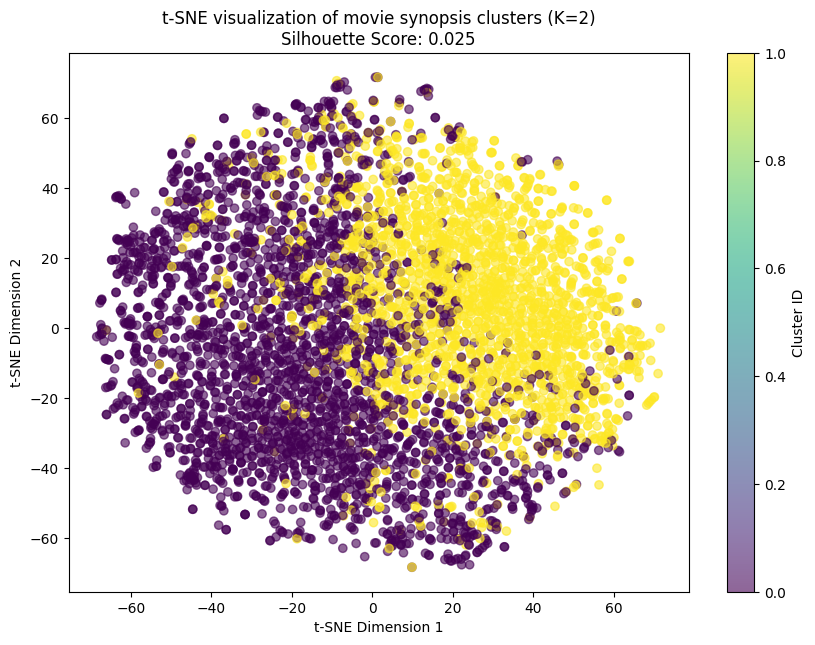

In [ ]:
# Set the figure size to ensure the plot is large enough to be readable
plt.figure(figsize=(10,7))

# Create a scatter plot using the 2D coordinates from t-SNE, colored by their cluster ID
scatter = plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1], c=df['cluster'], cmap='viridis', alpha=0.6)

# Add a color bar to the side to act as a legend for the Cluster IDs
plt.colorbar(scatter, label='Cluster ID')

# Add a descriptive title including the number of clusters and the model performance
plt.title(f't-SNE visualization of movie synopsis clusters (K={best_k})\nSilhouette Score: {best_score:.3f}')

# Label the X-axis as the first t-SNE dimension
plt.xlabel('t-SNE Dimension 1')

# Label the Y-axis as the second t-SNE dimension
plt.ylabel('t-SNE Dimension 2')

# Display the final plot on the screen
plt.show()